#  Objectives:

The Sentiment Analysis Project aims to develop an intelligent system based on AI technology to classify sentiment in Indonesian presidential election tweet data in the 2019 period using text analysis methods. This system will help identify trends in user opinions on the platform into three classes: positive, negative, or neutral.

- Exploratory Data Analysis tweet data
- Data preprocessing
- Experimentation for model sentiment analysis, using
  - Pretrained Model
  - RNN + LSTM Model
- Evaluate and choose the best model as sentiment analyzer

## Load base library and data

In [328]:
# import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [329]:
df =  pd.read_csv('./data/tweet.csv')

## EDA

In [330]:
df.head()

,Unnamed: 0,sentimen,tweet
0,0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦"
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ"
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp"
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!"
4,4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak"


In [331]:
df.isnull().sum()

Unnamed: 0    0
sentimen      0
tweet         0
dtype: int64

In [332]:
df['sentimen'].value_counts()

sentimen
positif    612
netral     607
negatif    596
Name: count, dtype: int64

## Data Prepocessing

###  Data Cleaning

In [333]:
# Copy data to ensure the original data is safe
df_temp = df.copy()

In [334]:
# Hot encoding for all the class
label_mapping = {'negatif': 0, 'netral': 1, 'positif': 2}

# Ensure the 'sentimen' column is in string format, strip spaces and convert to lowercase
df_temp['sentimen'] = df_temp['sentimen'].astype(str).str.strip().str.lower()

# Map the values
df_temp['encoded_sentiment_value'] = df_temp['sentimen'].map(label_mapping)

In [335]:
df_temp.head()

,Unnamed: 0,sentimen,tweet,encoded_sentiment_value
0,0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",0
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",1
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",1
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",2
4,4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",0


In [336]:
# Drop unescessary index column
df_temp = df_temp.drop(['Unnamed: 0'], axis=1)

### Polarity Checking

In [337]:
# Load the positive and negative lexicons
lexicon_positive = pd.read_csv('./data/positive.tsv', delimiter='\t', names=['word', 'score'], header=None)
lexicon_negative = pd.read_csv('./data/negative.tsv', delimiter='\t', names=['word', 'score'], header=None)

In [338]:
# Ensure the scores are integers
lexicon_positive['score'] = lexicon_positive['score'].astype(int)
lexicon_negative['score'] = lexicon_negative['score'].astype(int)

In [339]:
# Convert lexicons to dictionaries
lexicon_positive = dict(zip(lexicon_positive['word'], lexicon_positive['score']))
lexicon_negative = dict(zip(lexicon_negative['word'], lexicon_negative['score']))

In [340]:
# Function to determine sentiment polarity of tweets
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    words = text.split()
    for word in words:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        if word in lexicon_negative:
            score += lexicon_negative[word]
    if score > 0:
        polarity = 'positif'
    elif score < 0:
        polarity = 'negatif'
    else:
        polarity = 'netral'
    return score, polarity

In [341]:
# Apply the sentiment analysis function
df_temp['polarity_score'], df_temp['predicted_sentiment'] = zip(*df_temp['tweet'].apply(sentiment_analysis_lexicon_indonesia))

In [342]:
# Determine if the predicted sentiment matches the original sentiment
df_temp['sentiment_match'] = df_temp['sentimen'] == df_temp['predicted_sentiment']

# Count the number of matches and mismatches
matches = df_temp['sentiment_match'].sum()
mismatches = len(df_temp) - matches

print(f'Matches: {matches}, Mismatches: {mismatches}')

# Show a few rows of the dataframe for verification
df_temp.head()

Matches: 776, Mismatches: 1039


,sentimen,tweet,encoded_sentiment_value,polarity_score,predicted_sentiment,sentiment_match
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",0,0,netral,False
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",1,-3,negatif,False
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",1,2,positif,False
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",2,3,positif,True
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",0,-13,negatif,True


In [343]:
match_counts = df_temp.groupby(['sentimen', 'sentiment_match']).size().reset_index(name='counts')

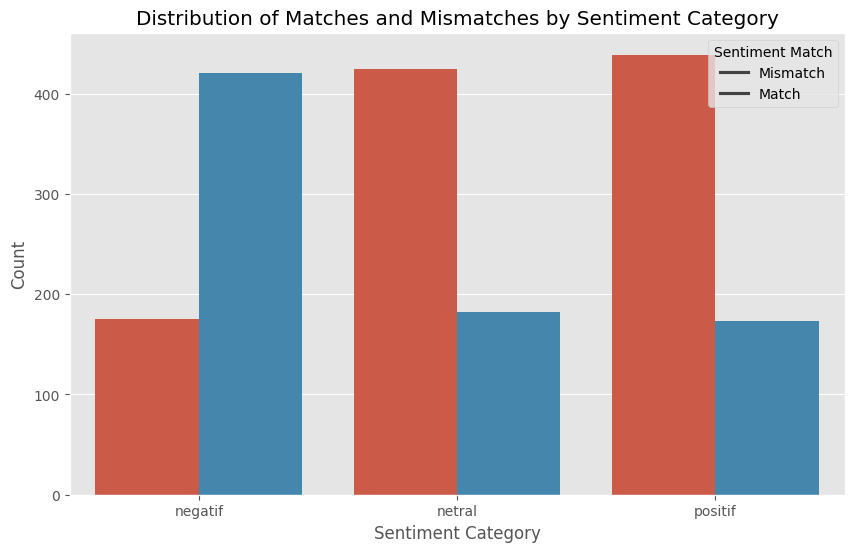

In [344]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=match_counts, x='sentimen', y='counts', hue='sentiment_match')
plt.title('Distribution of Matches and Mismatches by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.legend(title='Sentiment Match', loc='upper right', labels=['Mismatch', 'Match'])
plt.show()

In [345]:
df_polar = df_temp.drop(['sentimen', 'encoded_sentiment_value', 'sentiment_match'], axis=1)

In [346]:
df_polar.head()

,tweet,polarity_score,predicted_sentiment
0,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",0,netral
1,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",-3,negatif
2,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",2,positif
3,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",3,positif
4,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",-13,negatif


In [347]:
# Map the values
df_polar['sentimen'] = df_polar['predicted_sentiment'].map(label_mapping)
df_polar = df_polar.drop(['predicted_sentiment'], axis=1)

In [348]:
df_polar.head()

,tweet,polarity_score,sentimen
0,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",0,1
1,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",-3,0
2,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",2,2
3,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",3,2
4,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",-13,0


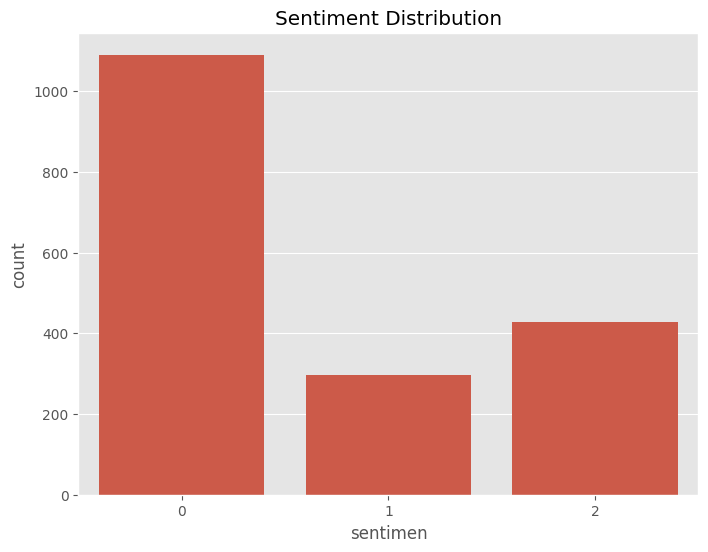

In [349]:
# Sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentimen', data=df_polar)
plt.title('Sentiment Distribution')
plt.show()

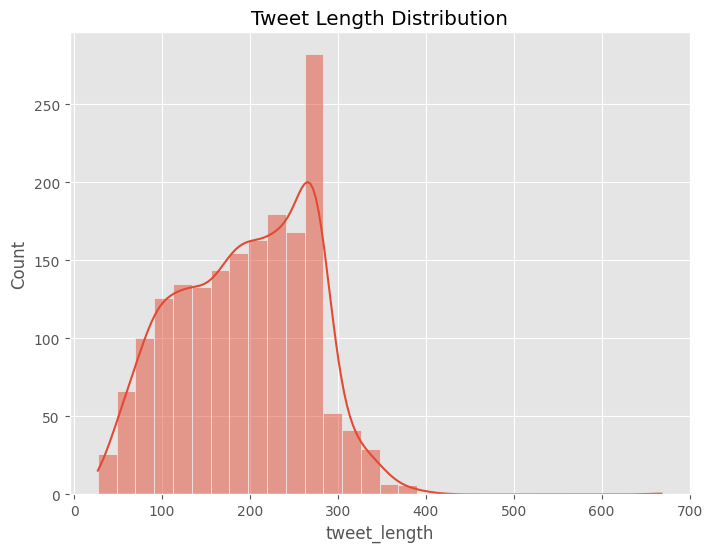

In [350]:
df_polar_temp = df_polar.copy()
df_polar_temp['tweet_length'] = df_polar_temp['tweet'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(df_polar_temp['tweet_length'], bins=30, kde=True)
plt.title('Tweet Length Distribution')
plt.show()

In [351]:
from wordcloud import WordCloud

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, max_font_size=100, max_words=100, background_color="white").generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

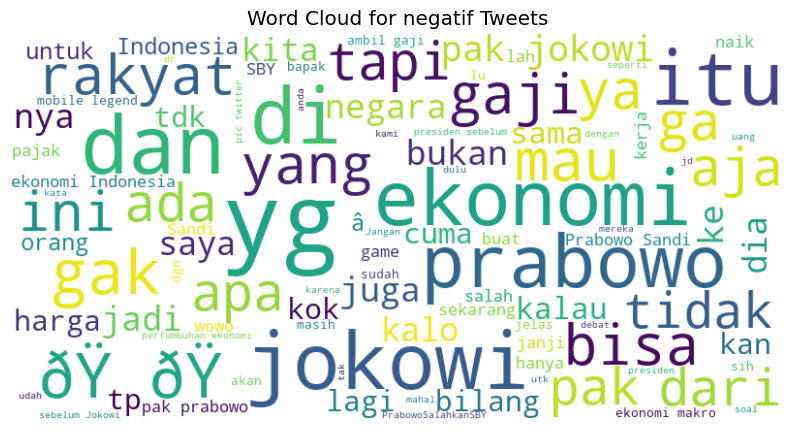

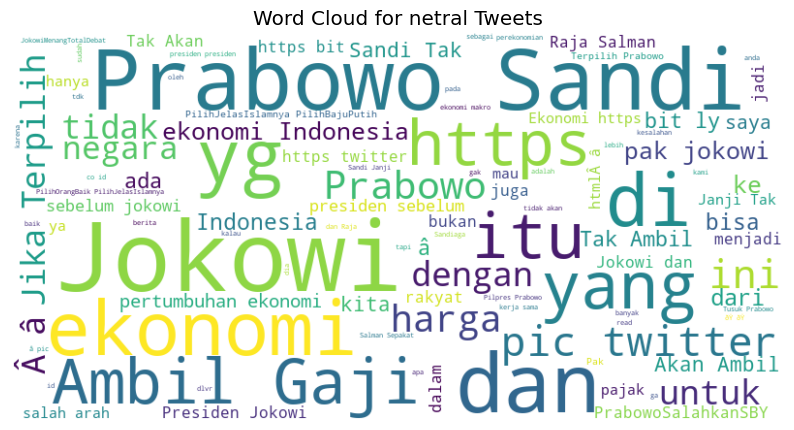

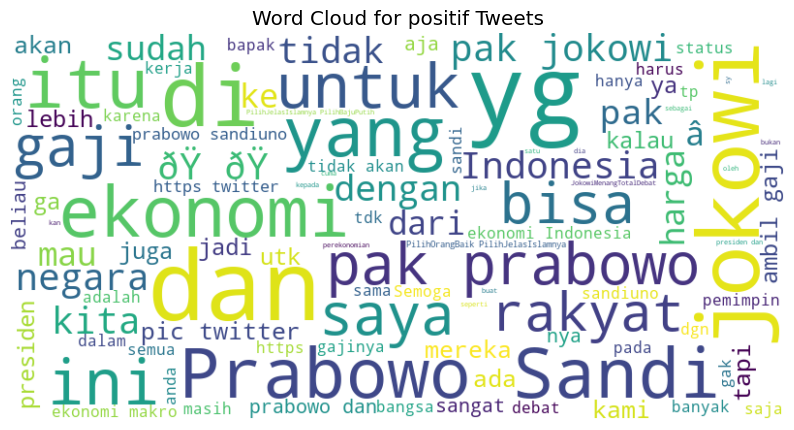

In [352]:
# Generate word clouds for each sentiment
for sentiment in df['sentimen'].unique():
    text = ' '.join(df[df['sentimen'] == sentiment]['tweet'])
    plot_wordcloud(text, f'Word Cloud for {sentiment} Tweets')


### Text Cleaning

In [353]:
import re

#### Remove emoji

In [354]:
emojis = pd.read_csv('./data/emojis.csv')
emojis = list(emojis['emoji'])
suff_emojis = list(set(map(lambda x:x[0],emojis)))

def remove_emoji(text):
  pattern = []
  for suff in suff_emojis:
    pattern.append(f'{suff}[\w\s]*')
  pattern = '|'.join(pattern)
  compile_pattern = re.compile(pattern)
  text = compile_pattern.sub(' ', text)
  text = re.sub(r'[^\w\s]', ' ', text)
  res = re.sub(r'\s{2,}', ' ', text)
  return res

#### Remove regex related

In [355]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', str(text))

def cleaning_pic_urls (text):
    text = re.sub(r'pic.twitter.com/[\w]*',"", text)
    return text

def remove_mentions(text):
    mention_pattern = re.compile(r'@[\W]*')
    return mention_pattern.sub(r' ',text)

def remove_hashtags(text):
    return text.replace(r'#', '')

def remove_punctuation(text):
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    return ''.join(' ' if char in punctuations else char for char in text)

#### Case Folding & white spaces

In [356]:
def normalize_whitespace(text):
    return ' '.join(text.split())

def case_folding(text):
    return text.lower()

#### Wrapper Func

In [357]:
def clean_text(text):
    text = remove_urls(text)
    text = cleaning_pic_urls(text)
    text = remove_emoji(text)
    text = remove_hashtags(text)
    text = remove_mentions(text)
    text = remove_punctuation(text)
    text = normalize_whitespace(text)
    text = case_folding(text)
    return text

In [358]:
df_polar['tweet'] = df_polar['tweet'].apply(clean_text)

In [359]:
pd.set_option('display.max_colwidth', 250)
df_polar.iloc[0:15]

,tweet,polarity_score,sentimen
0,kata prabowo indonesia tidak dihargai bangsa asing berita ini pasti hoax buatan penguasa ya kan rockygerung,0,1
1,batuan langka tasbih jokowi hadiah dari habib luthfi seharga mercy,-3,0
2,di era jokowi ekonomi indonesia semakin baik,2,2
3,bagi sumatera selatan asian games berdampak pd ekonomi langsung diprediksi mencapai indonesia maju jokowi hebat,3,2
4,negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat terus masyarakatnya ngeluh karena negara ngutang setiap negara itu pasti ngutang utang bisa dibayar kalo negara dapet penghasilan penghasilan negara itu ya dari pajak,-13,0
5,yg bisikin pak jokowi cm mikirin perputaran duit di golongan tertentu e sports hanya sebagian kecil dr sekian besar penentu pertumbuhan perekonomian indonesia bukan hal fundamental betul yg dikatakan prabowo walau dgn bhs yg sederhana tp mrpkan a...,-20,0
6,masa tenang msih ngoceh aja ttp jokowi harga mati,7,2
7,multilateral kita doakan di tps sambil dengarkan suara hati,1,2
8,iya bener aa kita mantap kan pilihan ke pemimpin yg bs memberi solusi jokowi bukan yg menyalahkan pemimpin sebelumnya sbyudhoyono dismash sm mas bowo percuma koalisi klau mengantam tmn koalisi yg plg penting pilih pemimpin yg rajin ibadah wajib b...,1,2
9,prabowo sandi sepakat tak ambil gaji karena negara sedang susah,-3,0


### Remove Stop words

In [360]:
import nltk
from nltk.corpus import stopwords
import requests
import random

nltk.download('stopwords')
nltk.download('punkt')

# URLs for stopwords
STOPWORDS_URLS = [
    "https://raw.githubusercontent.com/ramaprakoso/analisis-sentimen/master/kamus/stopword.txt",
    "https://raw.githubusercontent.com/yasirutomo/python-sentianalysis-id/master/data/feature_list/stopwordsID.txt",
    "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/fpmipa-stopwords.txt",
    "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/sastrawi-stopwords.txt",
    "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/aliakbars-bilp.txt",
    "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/pebbie-pebahasa.txt",
    "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-id.txt"
]

# Custom stopwords
CUSTOM_STOPWORDS = ['yang', 'untuk', 'pada', 'ke', 'dari', 'dan', 'dengan', 'oleh', 'bagi',
                    'serta', 'atau', 'tapi', 'karena', 'jadi', 'walaupun', 'meskipun', 'sehingga',
                    'agar', 'supaya', 'guna', 'demi', 'sebab', 'akibat', 'melainkan', 'sebaliknya',
                    'selain', 'kecuali', 'apalagi', 'asal', 'bila', 'kalau', 'jika', 'sementara', 'sewaktu',
                    'setelah', 'sebelum', 'lalu', 'kemudian', 'kini', 'sekarang', 'nanti', 'kembali', 'lagi',
                    'hanya', 'saja', 'pun', 'juga', 'malah', 'memang', 'tentu', 'sungguh', 'amat', 'sekali', 'apatah',
                    'mengapa', 'ialah', 'yaitu', 'yakni', 'begini', 'begitu', 'apakah', 'mengapa', 'siapa', 'mengapa', 'bagaimana',
                    'kapan', 'dimana', 'berapa', 'kemana', 'daripada', 'yg', 'itu.', 'ya', 'ga', 'dari', 'ke', 'pak', 'kan', 'nya', 'dgn',
                    'pas', 'tll', 'trsa', 'bang', 'smpai', 'ama', 'bikin', 'nih', 'pdahl', 'bangettt', 'btw', 'plg', 'ntar', 'skrg', 'ttg',
                    'tu', 'emg', 'ane', 'mnrt', 'tjoy', 'abis', 'bs', 'trjadi', 'kalo', 'guys', 'ma', 'aja', 'bgt', 'gua', 'sbnrnya', 'dr', 'sm', 'banget',
                    'sy', 'haha', 'aj', 'hrs', 'sllu', 'lanjut', 'utk', 'pdhl', 'ajaa', 'tp', 'kta', 'mas', 'tnx', 'udh', 'gwa', 'lol', 'bgtu', 'hemm', 'sih', 'bnyak', 'akan', 'si']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shabiras/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/shabiras/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [361]:
def shuffle_stopwords(stopwords):
    random.shuffle(stopwords)
    return stopwords

def get_nltk_stopwords():
    return set(stopwords.words('indonesian'))

def fetch_stopwords(url):
    response = requests.get(url)
    return set(response.text.split('\n'))

def get_custom_stopwords(custom_stopwords):
    return set(custom_stopwords)

def construct_stopwords(urls, custom_stopwords):
    stop_words = get_nltk_stopwords()
    for url in urls:
        stop_words.update(fetch_stopwords(url))
    stop_words.update(get_custom_stopwords(custom_stopwords))
    return stop_words

In [362]:
# Shuffle custom stopwords
shuffled_custom_stopwords = shuffle_stopwords(CUSTOM_STOPWORDS)

# Construct final stopwords set
stop_words = construct_stopwords(STOPWORDS_URLS, shuffled_custom_stopwords)

# Print to verify
print(f'Stopwords: {list(stop_words)[:15]}')

Stopwords: ['atas', 'bakal', 'wakil ', 'menunjuk', 'perlunya', 'langsung', 'hampir', 'walau', 'dulunya', 'jawaban', 'masuk', 'sendirinya', 'tapi', 'sabtu', 'beginian']


In [363]:
# remove stopwords
from nltk import word_tokenize

def remove_stopword(text, stop_words=stop_words):
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

In [364]:
df_polar['tweet'] = df_polar['tweet'].apply(remove_stopword)

In [365]:
df_polar.iloc[0:15]

,tweet,polarity_score,sentimen
0,prabowo indonesia dihargai bangsa asing berita hoax buatan penguasa rockygerung,0,1
1,batuan langka tasbih jokowi hadiah habib luthfi seharga mercy,-3,0
2,era jokowi ekonomi indonesia,2,2
3,sumatera asian games berdampak pd ekonomi diprediksi indonesia maju jokowi hebat,3,2
4,negara ngutang bngun infrastruktur dipake masyarakat masyarakatnya ngeluh negara ngutang negara ngutang utang dibayar negara dapet penghasilan penghasilan negara pajak,-13,0
5,bisikin jokowi cm mikirin perputaran duit golongan e sports penentu pertumbuhan perekonomian indonesia fundamental prabowo bhs sederhana mrpkan aspek fundamental ekonomi,-20,0
6,tenang msih ngoceh ttp jokowi harga mati,7,2
7,multilateral doakan tps dengarkan suara hati,1,2
8,bener aa mantap pilihan pemimpin solusi jokowi menyalahkan pemimpin sbyudhoyono dismash bowo koalisi klau mengantam tmn koalisi pilih pemimpin rajin ibadah wajib ngaji jumatan,1,2
9,prabowo sandi sepakat ambil gaji negara susah,-3,0


### Stemming and Lemmatization

In [366]:
# stemming and lemmatization
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming_and_lemmatization(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

In [367]:
df_polar['tweet'] = df_polar['tweet'].apply(stemming_and_lemmatization)

In [368]:
df_polar.iloc[0:15]

,tweet,polarity_score,sentimen
0,prabowo indonesia harga bangsa asing berita hoax buat kuasa rockygerung,0,1
1,batu langka tasbih jokowi hadiah habib luthfi harga mercy,-3,0
2,era jokowi ekonomi indonesia,2,2
3,sumatera asi games dampak pd ekonomi prediksi indonesia maju jokowi hebat,3,2
4,negara ngutang bngun infrastruktur dipake masyarakat masyarakat ngeluh negara ngutang negara ngutang utang bayar negara dapet hasil hasil negara pajak,-13,0
5,bisikin jokowi cm mikirin putar duit golong e sports tentu tumbuh ekonomi indonesia fundamental prabowo bhs sederhana mrpkan aspek fundamental ekonomi,-20,0
6,tenang msih ngoceh ttp jokowi harga mati,7,2
7,multilateral doa tps dengar suara hati,1,2
8,bener aa mantap pilih pimpin solusi jokowi salah pimpin sbyudhoyono dismash bowo koalisi klau mengantam tmn koalisi pilih pimpin rajin ibadah wajib ngaji jumat,1,2
9,prabowo sandi sepakat ambil gaji negara susah,-3,0


In [369]:
# tokenization
def tokenize(text):
    return word_tokenize(text)

In [370]:
df_polar['tweet'] = df_polar['tweet'].apply(tokenize)

In [371]:
df_polar.iloc[0:15]

,tweet,polarity_score,sentimen
0,"[prabowo, indonesia, harga, bangsa, asing, berita, hoax, buat, kuasa, rockygerung]",0,1
1,"[batu, langka, tasbih, jokowi, hadiah, habib, luthfi, harga, mercy]",-3,0
2,"[era, jokowi, ekonomi, indonesia]",2,2
3,"[sumatera, asi, games, dampak, pd, ekonomi, prediksi, indonesia, maju, jokowi, hebat]",3,2
4,"[negara, ngutang, bngun, infrastruktur, dipake, masyarakat, masyarakat, ngeluh, negara, ngutang, negara, ngutang, utang, bayar, negara, dapet, hasil, hasil, negara, pajak]",-13,0
5,"[bisikin, jokowi, cm, mikirin, putar, duit, golong, e, sports, tentu, tumbuh, ekonomi, indonesia, fundamental, prabowo, bhs, sederhana, mrpkan, aspek, fundamental, ekonomi]",-20,0
6,"[tenang, msih, ngoceh, ttp, jokowi, harga, mati]",7,2
7,"[multilateral, doa, tps, dengar, suara, hati]",1,2
8,"[bener, aa, mantap, pilih, pimpin, solusi, jokowi, salah, pimpin, sbyudhoyono, dismash, bowo, koalisi, klau, mengantam, tmn, koalisi, pilih, pimpin, rajin, ibadah, wajib, ngaji, jumat]",1,2
9,"[prabowo, sandi, sepakat, ambil, gaji, negara, susah]",-3,0


In [372]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

MAX_FEATURES = 1000
MAX_LEN=50

# tokenizer = Tokenizer(num_words=MAX_FEATURES, oov_token='<OOV>')
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(df_polar['tweet'])
sequences = tokenizer.texts_to_sequences(df_polar['tweet'])

X = pad_sequences(sequences, padding='post', maxlen=MAX_LEN)

In [373]:
# check the shape
X.shape

(1815, 50)

In [374]:
# variable initiation
y = df_polar['sentimen']

In [375]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)
y_val = to_categorical(y_val, 3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1233, 50) (1233, 3)
(273, 50) (273, 3)


In [376]:
import tensorflow.keras.backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [377]:
from keras.optimizers import  SGD
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from keras.models import Sequential


vocab_size = 5000
embedding_size = 32
epochs=100
learning_rate = 0.05
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
def create_model():
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_size, input_length=MAX_LEN))
    model.add(Bidirectional(LSTM(units=16, dropout=0.1,  recurrent_dropout=0.1)))
    model.add(Dense(24, activation="relu"))
    model.add(Dropout(0.1))
    model.add(Dense(3, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                    optimizer=sgd,
                    metrics=['accuracy',f1_m, precision_m, recall_m])
    return model

import tensorflow as tf
# tf.keras.utils.plot_model(model, show_shapes=True)

In [378]:
model = create_model()
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy',f1_m, precision_m, recall_m])

# Train model

batch_size = 32
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=2)

Epoch 1/100
39/39 - 2s - 46ms/step - accuracy: 0.5953 - f1_m: 0.4913 - loss: 0.9592 - precision_m: 0.4998 - recall_m: 0.4854 - val_accuracy: 0.5922 - val_f1_m: 0.5981 - val_loss: 0.9519 - val_precision_m: 0.5981 - val_recall_m: 0.5981
Epoch 2/100
39/39 - 0s - 12ms/step - accuracy: 0.6050 - f1_m: 0.6026 - loss: 0.9428 - precision_m: 0.6035 - recall_m: 0.6017 - val_accuracy: 0.5922 - val_f1_m: 0.5981 - val_loss: 0.9479 - val_precision_m: 0.5981 - val_recall_m: 0.5981
Epoch 3/100
39/39 - 0s - 11ms/step - accuracy: 0.6050 - f1_m: 0.6007 - loss: 0.9435 - precision_m: 0.6020 - recall_m: 0.5995 - val_accuracy: 0.5922 - val_f1_m: 0.5981 - val_loss: 0.9431 - val_precision_m: 0.5981 - val_recall_m: 0.5981
Epoch 4/100
39/39 - 0s - 11ms/step - accuracy: 0.6050 - f1_m: 0.5975 - loss: 0.9357 - precision_m: 0.6111 - recall_m: 0.5871 - val_accuracy: 0.5922 - val_f1_m: 0.5981 - val_loss: 0.9353 - val_precision_m: 0.5981 - val_recall_m: 0.5981
Epoch 5/100
39/39 - 0s - 11ms/step - accuracy: 0.6050 - f1_m

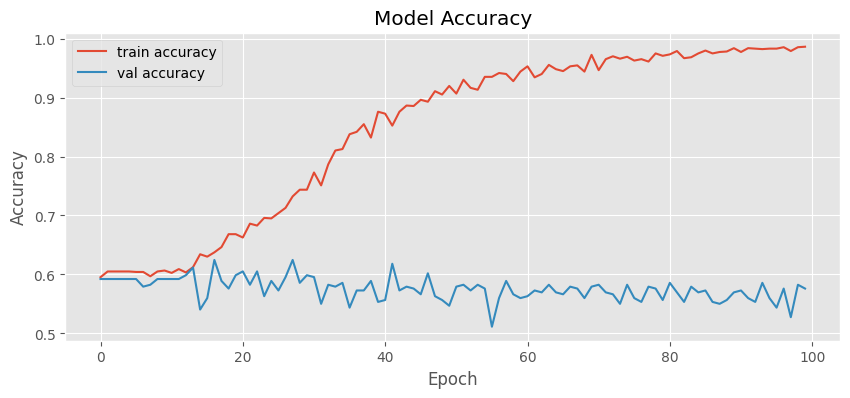

In [379]:
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(history.history['accuracy'], label = 'train accuracy')
ax.plot(history.history['val_accuracy'], label = 'val accuracy')
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')
plt.show()

## Other experimentation

## drop non valid value according to the polarity

In [380]:
# Get data from df temp
df_temp

,sentimen,tweet,encoded_sentiment_value,polarity_score,predicted_sentiment,sentiment_match
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",0,0,netral,False
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",1,-3,negatif,False
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",1,2,positif,False
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",2,3,positif,True
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",0,-13,negatif,True
...,...,...,...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat #2019GantiPresiden,1,5,positif,False
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekonomian makin membaik. #PutihkanGBK,1,2,positif,False
1812,netral,Mari bangun bangsa dgn mendukung perekonomian negara bersama Pak Jokowi. Ayo kerja! https://twitter.com/KaskusLoker/status/1111643312241295363Â â€¦,1,3,positif,False
1813,netral,"Bantu majukan perekonomian bangsa bersama Pak Jokowi, yuk! https://twitter.com/BKNSquare/status/1113655944955588610Â â€¦",1,3,positif,False


In [381]:
# filter the data only true
df_filtered = df_temp[df_temp['sentiment_match'] == True]

In [382]:
# see how mouc data left
df_filtered.tweet.count()

776

In [383]:
df_filtered = df_filtered.drop(['sentimen', 'encoded_sentiment_value', 'sentiment_match'], axis=1)

In [384]:
df_filtered.head()

,tweet,polarity_score,predicted_sentiment
3,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",3,positif
4,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",-13,negatif
6,Masa tenang msih ngoceh aja..ttp jokowi harga mati...,7,positif
7,"#UASdifitnahKejiBalasDiTPS kerjasa ekonomi bilateral, multilateral kita doakan di TPS sambil dengarkan suara hati... #UASdifitnahKejiBalasDiTPS",1,positif
9,Prabowo-Sandi Sepakat Tak Ambil Gaji karena Negara Sedang Susah https://www.goaceh.co/artikel/serbaserbi/2019/04/14/prabowosandi-sepakat-tak-ambil-gaji-karena-negara-sedang-susah/?utm_source=dlvr.it&utm_medium=twitterÂ â€¦ .. ... #GoAceh,-3,negatif


In [385]:
# Map the values
df_filtered['sentimen'] = df_filtered['predicted_sentiment'].map(label_mapping)
df_filtered = df_filtered.drop(['predicted_sentiment'], axis=1)

In [386]:
df_experiment = df_filtered.copy()

In [387]:
df_experiment

,tweet,polarity_score,sentimen
3,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",3,2
4,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",-13,0
6,Masa tenang msih ngoceh aja..ttp jokowi harga mati...,7,2
7,"#UASdifitnahKejiBalasDiTPS kerjasa ekonomi bilateral, multilateral kita doakan di TPS sambil dengarkan suara hati... #UASdifitnahKejiBalasDiTPS",1,2
9,Prabowo-Sandi Sepakat Tak Ambil Gaji karena Negara Sedang Susah https://www.goaceh.co/artikel/serbaserbi/2019/04/14/prabowosandi-sepakat-tak-ambil-gaji-karena-negara-sedang-susah/?utm_source=dlvr.it&utm_medium=twitterÂ â€¦ .. ... #GoAceh,-3,0
...,...,...,...
1785,Harga harga bahan pokok terkendali #2019GantiPresiden,0,1
1792,Dan hanya di bawah kepemimpinan Zonk DPR kita jadi super nyinyir dan malah menghina saat ada puteri bangsa Indonesia dihargai di mata dunia.,-8,0
1793,"Soalnya kalau pak Prabowo jadi presiden, dinasti cendana bisa bangun kekuasaan lagi dan orde baru... Ya gitulah. Lebih2 harta pak Harto di swiss yang kena amnesti pajak kemarin bakal ada perundingan ulang kalau pak Prabowo jadi presiden. Kurang l...",-16,0
1805,Berkat Jokowi masa depan tampak suram bagi perekonomian rakyat Indonesia #jokowimediaoligarki,-9,0


####  Words cleaning(Again?!?!)

In [388]:
df_experiment['tweet'] = df_experiment['tweet'].apply(clean_text)

#### Remove stop words(Again?!?!)

In [389]:
df_experiment['tweet'] = df_experiment['tweet'].apply(remove_stopword)

#### Stemming and lematization(Again?!?!)

In [390]:
df_experiment['tweet'] = df_experiment['tweet'].apply(stemming_and_lemmatization)

In [391]:
df_experiment['tweet'] = df_experiment['tweet'].apply(tokenize)

In [392]:
# tokenizer = Tokenizer(num_words=MAX_FEATURES, oov_token='<OOV>')
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(df_experiment['tweet'])
sequences = tokenizer.texts_to_sequences(df_experiment['tweet'])

X2 = pad_sequences(sequences, padding='post', maxlen=MAX_LEN)

In [393]:
X2

array([[496, 497, 205, ...,   0,   0,   0],
       [ 12, 378, 107, ...,   0,   0,   0],
       [379, 380,   2, ...,   0,   0,   0],
       ...,
       [  3,   5, 778, ...,   0,   0,   0],
       [  2, 979,   1, ...,   0,   0,   0],
       [268, 285, 278, ...,   0,   0,   0]], dtype=int32)

In [394]:
y2 = df_experiment['sentimen']

In [395]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.15, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)
y_val = to_categorical(y_val, 3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(527, 50) (527, 3)
(117, 50) (117, 3)


### Train the same model with diffrent data

In [396]:
model2 = create_model()

# Re initiating the optimizer
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

# Compile model also we use Adam instead(after trying itseems like this quite affecting the performance on validation set by arround 5%)
model2.compile(loss='categorical_crossentropy', optimizer='Adam', 
               metrics=['accuracy',f1_m, precision_m, recall_m])

# Train model
batch_size = 32
history2 = model2.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=2)

Epoch 1/100
17/17 - 2s - 122ms/step - accuracy: 0.5408 - f1_m: 0.0000e+00 - loss: 1.0523 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_accuracy: 0.5379 - val_f1_m: 0.0000e+00 - val_loss: 1.0226 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/100
17/17 - 0s - 12ms/step - accuracy: 0.5636 - f1_m: 0.4429 - loss: 0.9960 - precision_m: 0.5375 - recall_m: 0.4001 - val_accuracy: 0.5379 - val_f1_m: 0.5750 - val_loss: 1.0028 - val_precision_m: 0.5750 - val_recall_m: 0.5750
Epoch 3/100
17/17 - 0s - 13ms/step - accuracy: 0.5636 - f1_m: 0.5242 - loss: 0.9713 - precision_m: 0.5801 - recall_m: 0.4799 - val_accuracy: 0.5379 - val_f1_m: 0.5893 - val_loss: 0.9726 - val_precision_m: 0.6053 - val_recall_m: 0.5750
Epoch 4/100
17/17 - 0s - 12ms/step - accuracy: 0.5617 - f1_m: 0.5363 - loss: 0.9310 - precision_m: 0.6254 - recall_m: 0.4728 - val_accuracy: 0.5379 - val_f1_m: 0.5885 - val_loss: 0.9175 - val_precision_m: 0.6707 - val_recall_m: 0.5312
Epoch 5/100
17/17 - 0s - 13ms/step 

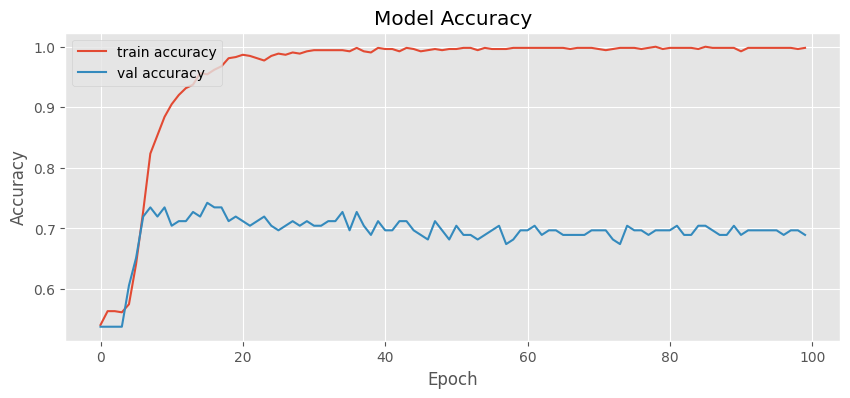

In [397]:
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(history2.history['accuracy'], label = 'train accuracy')
ax.plot(history2.history['val_accuracy'], label = 'val accuracy')
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')
plt.show()

#### Implement l2 regularization

In [398]:
from keras import regularizers


def create_LSTM_with_L2():
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_size, input_length=MAX_LEN))
    model.add(Bidirectional(LSTM(units=16, dropout=0.1,  recurrent_dropout=0.1)))
    model.add(Dense(24, kernel_regularizer=regularizers.l2(0.001), activation="relu"))
    model.add(Dropout(0.1))
    model.add(Dense(3, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy',f1_m, precision_m, recall_m])
    return model

#### initializing and checking the model


In [399]:
model3 = create_LSTM_with_L2()
print(model3.summary())

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [400]:
from keras.callbacks import EarlyStopping

# initializing early stopping 
early_stopping = EarlyStopping(monitor='loss', patience=3)

# training model
history3 = model3.fit(X_train,
        y_train,
        epochs=100,
        callbacks=[early_stopping],
        validation_data=(X_val, y_val),
        verbose=1)

Epoch 1/100


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5223 - f1_m: 0.0000e+00 - loss: 1.1019 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_accuracy: 0.5379 - val_f1_m: 0.0000e+00 - val_loss: 1.0493 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5846 - f1_m: 0.2267 - loss: 1.0173 - precision_m: 0.4284 - recall_m: 0.1926 - val_accuracy: 0.5379 - val_f1_m: 0.5750 - val_loss: 1.0115 - val_precision_m: 0.5750 - val_recall_m: 0.5750
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5892 - f1_m: 0.5554 - loss: 0.9589 - precision_m: 0.5855 - recall_m: 0.5286 - val_accuracy: 0.5379 - val_f1_m: 0.5753 - val_loss: 0.9626 - val_precision_m: 0.6959 - val_recall_m: 0.5000
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5989 - f1_m: 0.5527 - loss: 0.9144 - precision_m: 0.7012 - recall_m: 0.4589 - val_accuracy: 0.6288 - val_f1_m: 0.5678 - val_loss: 0.8960 - val_precision_m: 0.7360 - v

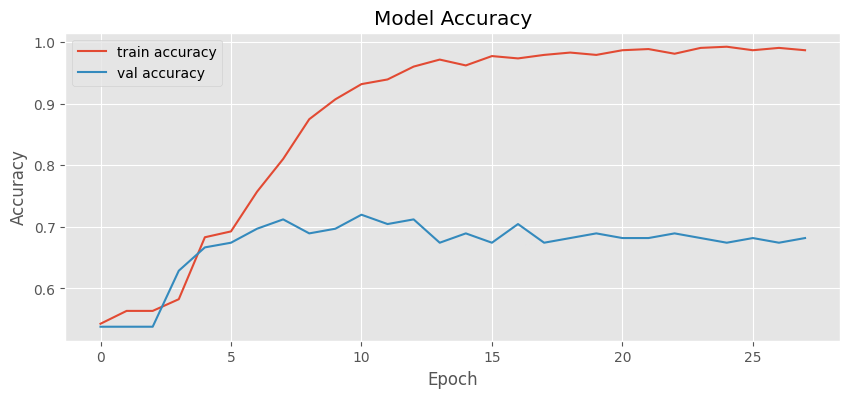

In [401]:
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(history3.history['accuracy'], label = 'train accuracy')
ax.plot(history3.history['val_accuracy'], label = 'val accuracy')
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')
plt.show()

#### Hyper param tunning

##### Random Search

In [402]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras import regularizers

def create_LSTM_with_L2(hp):
    model = Sequential()
    
    # Embedding layer
    model.add(Embedding(vocab_size, embedding_size, input_length=MAX_LEN))
    
    # Bidirectional LSTM layer with tunable units and dropout rates
    model.add(Bidirectional(LSTM(
        units=hp.Int('units', min_value=16, max_value=128, step=16),
        dropout=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1),
        recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.0, max_value=0.5, step=0.1)
    )))
    
    # Dense layer with tunable number of units and L2 regularization
    model.add(Dense(
        units=hp.Int('dense_units', min_value=16, max_value=128, step=16),
        kernel_regularizer=regularizers.l2(hp.Float('l2', min_value=1e-5, max_value=1e-2, sampling='log')),
        activation="relu"
    ))
    
    # Dropout layer with tunable dropout rate
    model.add(Dropout(hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
    
    # Output layer
    model.add(Dense(3, activation='softmax'))
    
    # Compile the model
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy', f1_m, precision_m, recall_m]
    )
    
    return model


In [434]:
from keras_tuner import RandomSearch

# Define the tuner
tuner = RandomSearch(
    create_LSTM_with_L2,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1,
    directory='randomSearch',
    project_name='LSTM_with_L2_tuning'
)

# Define the search space
tuner.search_space_summary()

# Start the hyperparameter search
tuner.search(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Summary of the results
tuner.results_summary()

Trial 20 Complete [00h 00m 21s]
val_accuracy: 0.7575757503509521

Best val_accuracy So Far: 0.7803030014038086
Total elapsed time: 00h 08m 22s
Results summary
Results in randomSearch/LSTM_with_L2_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 07 summary
Hyperparameters:
units: 48
dropout: 0.0
recurrent_dropout: 0.30000000000000004
dense_units: 16
l2: 5.9643556562362086e-05
dropout_2: 0.4
Score: 0.7803030014038086

Trial 13 summary
Hyperparameters:
units: 64
dropout: 0.0
recurrent_dropout: 0.2
dense_units: 96
l2: 0.0014169767094325439
dropout_2: 0.30000000000000004
Score: 0.7727272510528564

Trial 00 summary
Hyperparameters:
units: 96
dropout: 0.1
recurrent_dropout: 0.1
dense_units: 32
l2: 0.00575233871701001
dropout_2: 0.1
Score: 0.7575757503509521

Trial 09 summary
Hyperparameters:
units: 112
dropout: 0.4
recurrent_dropout: 0.2
dense_units: 128
l2: 2.713487091869326e-05
dropout_2: 0.30000000000000004
Score: 0.7575757503509521

Trial 14 summary
Hyp

In [457]:
from keras.callbacks import EarlyStopping

best_hp = tuner.get_best_hyperparameters()[0]

# Build the model with the best hyperparameters
model = create_LSTM_with_L2(best_hp)

In [458]:
# initializing early stopping 
early_stopping = EarlyStopping(monitor="loss", patience=25)

# training model
history4 = model3.fit(X_train,
        y_train,
        epochs=32,
        callbacks=[early_stopping],
        validation_data=(X_val, y_val),
        verbose=1)

Epoch 1/32
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9990 - f1_m: 0.9990 - loss: 0.0032 - precision_m: 0.9990 - recall_m: 0.9990 - val_accuracy: 0.6439 - val_f1_m: 0.6582 - val_loss: 3.0201 - val_precision_m: 0.6603 - val_recall_m: 0.6562
Epoch 2/32
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9953 - f1_m: 0.9953 - loss: 0.0053 - precision_m: 0.9953 - recall_m: 0.9953 - val_accuracy: 0.6515 - val_f1_m: 0.6709 - val_loss: 2.9983 - val_precision_m: 0.6732 - val_recall_m: 0.6687
Epoch 3/32
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9990 - f1_m: 0.9990 - loss: 0.0037 - precision_m: 0.9990 - recall_m: 0.9990 - val_accuracy: 0.6515 - val_f1_m: 0.6709 - val_loss: 2.9781 - val_precision_m: 0.6732 - val_recall_m: 0.6687
Epoch 4/32
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9982 - f1_m: 0.9982 - loss: 0.0048 - precision_m: 0.9982 - recall_m: 0.9982 - val_accuracy: 0.6591 - val_f1_m: 0.6709 - val_loss: 2.9463 - val_precision_m: 0.6732 - val_recall_m: 0.6

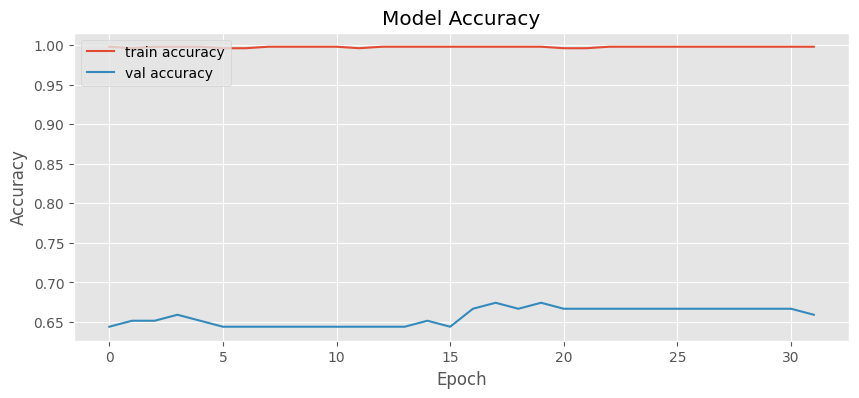

In [459]:
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(history4.history['accuracy'], label = 'train accuracy')
ax.plot(history4.history['val_accuracy'], label = 'val accuracy')
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')
plt.show()

##### Bayesian opt

In [464]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras import regularizers

def create_LSTM_with_L2(hp):
    model = Sequential()
    
    # Embedding layer
    model.add(Embedding(vocab_size, embedding_size, input_length=MAX_LEN))
    
    # Bidirectional LSTM layer with tunable units and dropout rates
    model.add(Bidirectional(LSTM(
        units=hp.Int('units', min_value=16, max_value=128, step=16),
        dropout=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1),
        recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.0, max_value=0.5, step=0.1)
    )))
    
    # Dense layer with tunable number of units and L2 regularization
    model.add(Dense(
        units=hp.Int('dense_units', min_value=16, max_value=128, step=16),
        kernel_regularizer=regularizers.l2(hp.Float('l2', min_value=1e-5, max_value=1e-2, sampling='log')),
        activation="relu"
    ))
    
    # Dropout layer with tunable dropout rate
    model.add(Dropout(hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
    
    # Output layer
    model.add(Dense(3, activation='softmax'))
    
    # Compile the model
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy', f1_m, precision_m, recall_m]
    )
    
    return model

tuner = kt.BayesianOptimization(
    create_LSTM_with_L2,
    objective=kt.Objective('precision_m', direction='max'),
    max_trials=10,
    overwrite=True,
    directory="bayesianopt",
    project_name="LSTM_with_L2_tuning"
)

# Display the search space
tuner.search_space_summary()

# Start the hyperparameter search
tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Summary of the results
tuner.results_summary()

# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters()[0]

# Build the model with the best hyperparameters
model = create_LSTM_with_L2(best_hp)

# Train the model
history5 = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Trial 10 Complete [00h 00m 08s]
precision_m: 0.9139681458473206

Best precision_m So Far: 0.9564244747161865
Total elapsed time: 00h 01m 20s
Results summary
Results in bayesianopt/LSTM_with_L2_tuning
Showing 10 best trials
Objective(name="precision_m", direction="max")

Trial 04 summary
Hyperparameters:
units: 48
dropout: 0.1
recurrent_dropout: 0.30000000000000004
dense_units: 112
l2: 0.00040287974361334
dropout_2: 0.0
Score: 0.9564244747161865

Trial 07 summary
Hyperparameters:
units: 128
dropout: 0.2
recurrent_dropout: 0.0
dense_units: 128
l2: 0.0010303530852879585
dropout_2: 0.4
Score: 0.9514902830123901

Trial 08 summary
Hyperparameters:
units: 16
dropout: 0.2
recurrent_dropout: 0.1
dense_units: 112
l2: 1.3735123658207588e-05
dropout_2: 0.2
Score: 0.9432805180549622

Trial 06 summary
Hyperparameters:
units: 96
dropout: 0.4
recurrent_dropout: 0.1
dense_units: 48
l2: 1.1402508432437072e-05
dropout_2: 0.30000000000000004
Score: 0.932498574256897

Trial 05 summary
Hyperparameters:
unit

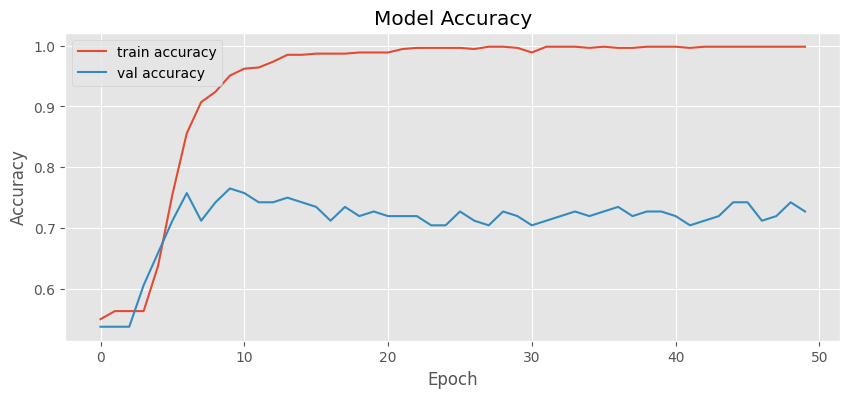

In [465]:
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(history5.history['accuracy'], label = 'train accuracy')
ax.plot(history5.history['val_accuracy'], label = 'val accuracy')
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')
plt.show()

### Conclusions
### in this particular case
1. Data is arguably misslable and cause over fitting in any model configuration
2. Cleaning data through **Polarity score and relabling** the data has bumped up to around 10% of the overall accuracy.
3. **L2 regularization** is used fully to reduce the improvement in performance (kind of stabilizeing).
4. RandomSearch has the best **validation** accuracy score of 78%.
5. With a few simple step LSTM could ou perform the pretrained bert by arround 10%
6. Focusing on **optimizing with in respect towards recall** value could help in order to minimize the overfitting since